In [24]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


In [25]:
#load dataset

df = pd.read_csv("SteelPlatesFaults.csv")
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [26]:
#dataset overview

df.shape

(1941, 34)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [10]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#define faulty columns

fault_columns = [
    "Pastry",
    "Z_Scratch",
    "K_Scatch",
    "Stains",
    "Dirtiness",
    "Bumps",
    "Other_Faults"
]


In [37]:
#Create Target Variable (Defect vs No Defect)

df["Fault_Type"] = df[fault_columns].idxmax(axis=1)

df["Fault_Type"].value_counts()



Fault_Type
Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: count, dtype: int64

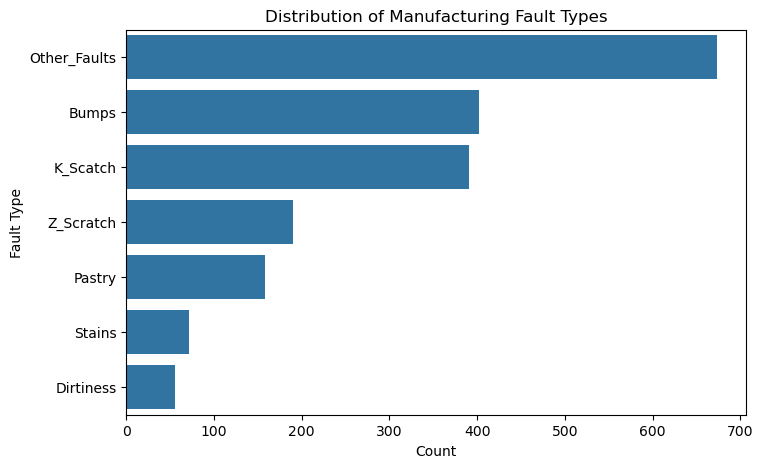

In [44]:
#Class Distribution

plt.figure(figsize=(8,5))
sns.countplot(
    y="Fault_Type",
    data=df,
    order=df["Fault_Type"].value_counts().index
)
plt.title("Distribution of Manufacturing Fault Types")
plt.xlabel("Count")
plt.ylabel("Fault Type")
plt.show()



In [48]:
# # Group-wise statistics by fault type

group_means = df.groupby("Fault_Type").mean(numeric_only=True)
group_means.head()




,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Defect,Fault_Present
Fault_Type,,,,,,,,,,,,,,,,,,,,,
Bumps,796.532338,814.305970,2.088487e+06,2.088506e+06,238.465174,29.251244,23.743781,26102.781095,89.495025,128.455224,...,0.439279,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
Dirtiness,887.927273,899.163636,2.318304e+06,2.318361e+06,363.490909,45.163636,57.854545,40545.054545,102.000000,132.618182,...,0.584502,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
K_Scatch,136.593350,285.061381,1.649200e+06,1.649336e+06,7622.654731,384.657289,255.350384,835433.601023,55.061381,137.109974,...,0.915748,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
Other_Faults,688.893016,717.517088,1.445118e+06,1.445152e+06,584.371471,52.787519,43.870728,61570.488856,94.607727,129.994056,...,0.537885,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
Pastry,807.132911,818.202532,1.868146e+06,1.868203e+06,561.620253,35.563291,57.734177,61262.835443,76.487342,126.506329,...,0.565559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [53]:
#Feature–Target Split

X = df.drop(columns=fault_columns + ["Fault_Type"])
y = df["Fault_Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [55]:
y_train.value_counts(normalize=True)


Fault_Type
Other_Faults    0.346649
Bumps           0.206830
K_Scatch        0.201675
Z_Scratch       0.097938
Pastry          0.081186
Stains          0.037371
Dirtiness       0.028351
Name: proportion, dtype: float64

In [56]:
y_test.value_counts(normalize=True)

Fault_Type
Other_Faults    0.347044
Bumps           0.208226
K_Scatch        0.200514
Z_Scratch       0.097686
Pastry          0.082262
Stains          0.035990
Dirtiness       0.028278
Name: proportion, dtype: float64

In [59]:
#Logistic Regression (Baseline, Interpretable)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(
    max_iter=2000,
    solver="lbfgs"
)

log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

       Bumps       0.69      0.57      0.62        81
   Dirtiness       0.88      0.64      0.74        11
    K_Scatch       0.95      0.91      0.93        78
Other_Faults       0.64      0.71      0.68       135
      Pastry       0.51      0.56      0.54        32
      Stains       0.86      0.86      0.86        14
   Z_Scratch       0.80      0.87      0.84        38

    accuracy                           0.73       389
   macro avg       0.76      0.73      0.74       389
weighted avg       0.73      0.73      0.73       389



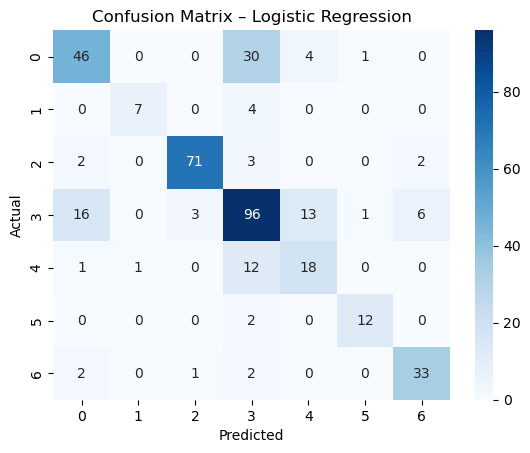

In [60]:
#Confusion Matrix (Logistic Regression)

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

In [64]:
#Random Forest Model (Performance-focused)

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

       Bumps       0.77      0.69      0.73        81
   Dirtiness       1.00      0.82      0.90        11
    K_Scatch       0.99      0.91      0.95        78
Other_Faults       0.69      0.85      0.76       135
      Pastry       0.65      0.47      0.55        32
      Stains       1.00      0.86      0.92        14
   Z_Scratch       0.97      0.87      0.92        38

    accuracy                           0.80       389
   macro avg       0.87      0.78      0.82       389
weighted avg       0.81      0.80      0.80       389



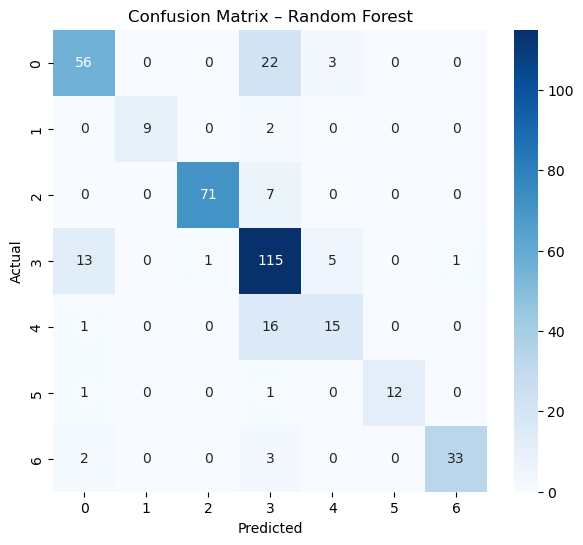

In [65]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(7,6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()


In [68]:
#Feature Importance (KEY SECTION)

importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("Top 10 Important Process Parameters:")
print(importances.head(10))

Top 10 Important Process Parameters:
Length_of_Conveyer       0.067059
LogOfAreas               0.066024
Sum_of_Luminosity        0.052819
Pixels_Areas             0.052046
Outside_X_Index          0.048008
Minimum_of_Luminosity    0.047544
Log_X_Index              0.047466
Orientation_Index        0.044115
X_Maximum                0.042844
Steel_Plate_Thickness    0.041536
dtype: float64


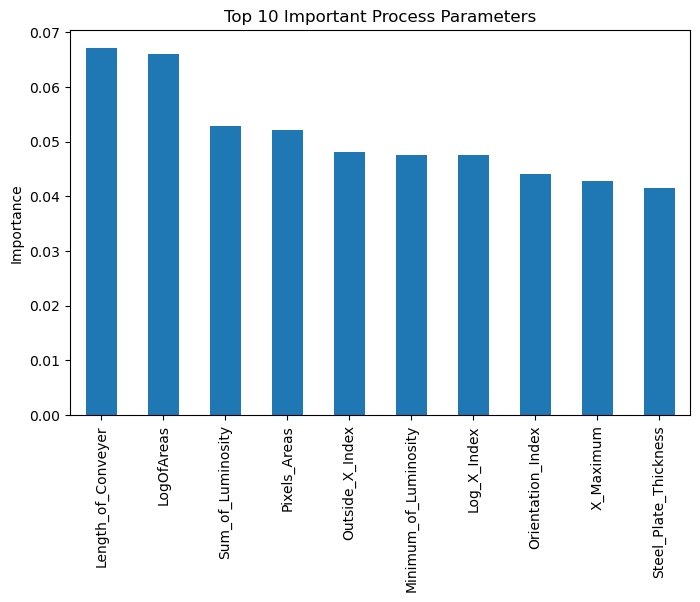

In [69]:
plt.figure(figsize=(8,5))
importances.head(10).plot(kind="bar")
plt.title("Top 10 Important Process Parameters")
plt.ylabel("Importance")
plt.show()


## Insights & Conclusions

### Key Process Insights
Feature importance analysis indicates that geometric parameters, surface area characteristics, and orientation-related features play a major role in distinguishing fault types. In particular, conveyor length, surface area metrics, and luminosity-based features show strong influence, suggesting that variations in material handling, surface condition, and plate alignment contribute significantly to fault occurrence.

### Model Comparison
Logistic Regression served as an interpretable baseline model but struggled to fully separate fault types with overlapping characteristics. Random Forest improved classification performance by capturing non-linear interactions between process parameters, reducing misclassification across major fault categories.

### Process Improvement Recommendations
- Prioritise monitoring of high-importance geometric and surface-related parameters.  
- Stabilise material handling and alignment to reduce fault variability.  
- Use the trained model as a decision-support tool for early fault diagnosis and targeted quality inspections.  
